**Name:** Vishv Patel

**Student Number:** 8977662

# Practical Lab 6 - Logistic Regression

##### Divide the class virginica and non-virgnica
4 histogram and the whole point is to see the difference between class
or 8 histogram

### Frame the Problem
The goal is to classify the species of an Iris flower given the dimensions of parts of the flower. The classification is binary, there are two classes: ***virginica and non-virginica.***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris


### 1. Obtain the data using the sklearn load_iris method. Redefine 2 classes for the target variable: virginica and non-virginica (the original dataset includes 3 classes).

In [3]:
# Step 1: Obtain the data using the sklearn load_iris method
iris = load_iris(as_frame=True)
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
display(iris_df.head())

# Step 2: Redefine 2 classes for the target variable: virginica and non-virginica
iris_df['target'] = iris_df['target'].map({0: 'non-virginica', 1: 'non-virginica', 2: 'virginica'})


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)   
0                5.1               3.5                1.4               0.2  \
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

### 2. Explore the data

##### i. 1 table with descriptive statistics for each of the two classes.

In [4]:
# Split the dataset into two separate dataframes based on the target variable classes
virginica_df = iris_df[iris_df['target'] == 'virginica']
non_virginica_df = iris_df[iris_df['target'] == 'non-virginica']

# Calculate descriptive statistics for each class
virginica_stats = virginica_df.describe()
non_virginica_stats = non_virginica_df.describe()

# Display the descriptive statistics for each class
print("Descriptive Statistics for 'virginica' class:")
display(virginica_stats)

print("\nDescriptive Statistics for 'non-virginica' class:")
display(non_virginica_stats)


Descriptive Statistics for 'virginica' class:


sepal length (cm)  sepal width (cm)  petal length (cm)   
count           50.00000         50.000000          50.000000  \
mean             6.58800          2.974000           5.552000   
std              0.63588          0.322497           0.551895   
min              4.90000          2.200000           4.500000   
25%              6.22500          2.800000           5.100000   
50%              6.50000          3.000000           5.550000   
75%              6.90000          3.175000           5.875000   
max              7.90000          3.800000           6.900000   

       petal width (cm)  
count          50.00000  
mean            2.02600  
std             0.27465  
min             1.40000  
25%             1.80000  
50%             2.00000  
75%             2.30000  
max             2.50000


Descriptive Statistics for 'non-virginica' class:


sepal length (cm)  sepal width (cm)  petal length (cm)   
count         100.000000        100.000000         100.000000  \
mean            5.471000          3.099000           2.861000   
std             0.641698          0.478739           1.449549   
min             4.300000          2.000000           1.000000   
25%             5.000000          2.800000           1.500000   
50%             5.400000          3.050000           2.450000   
75%             5.900000          3.400000           4.325000   
max             7.000000          4.400000           5.100000   

       petal width (cm)  
count        100.000000  
mean           0.786000  
std            0.565153  
min            0.100000  
25%            0.200000  
50%            0.800000  
75%            1.300000  
max            1.800000

##### ii. 1 Histogram per feature, for each of the two classes. 

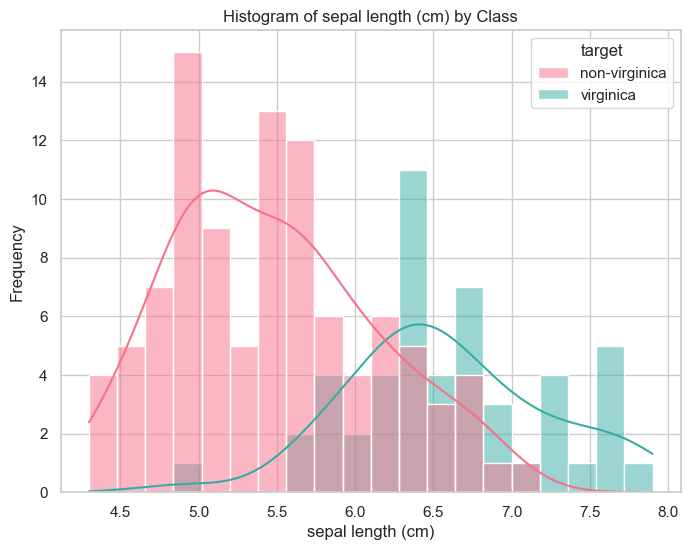

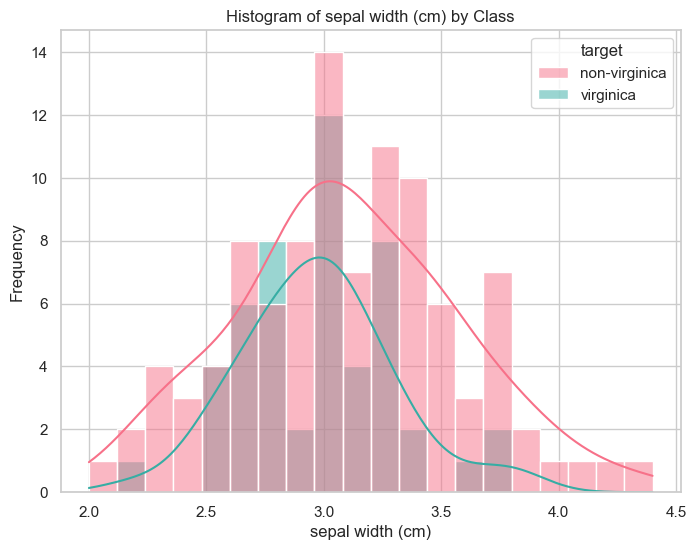

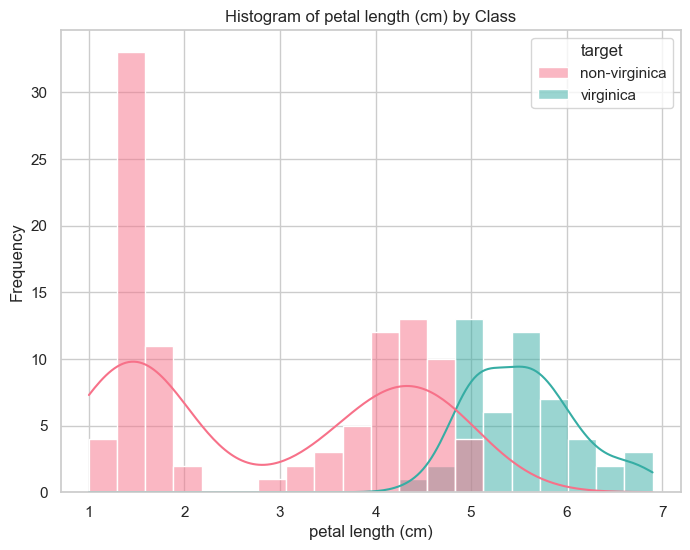

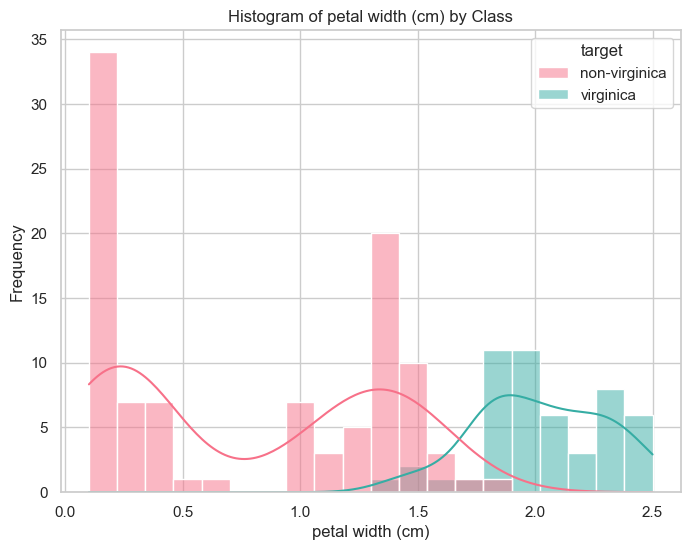

In [5]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot histograms for each feature, separated by class
for feature in iris.feature_names:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=iris_df, x=feature, hue='target', kde=True, palette="husl", bins=20)
    plt.title(f'Histogram of {feature} by Class')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


##### iii. Correlation matrix between the four features

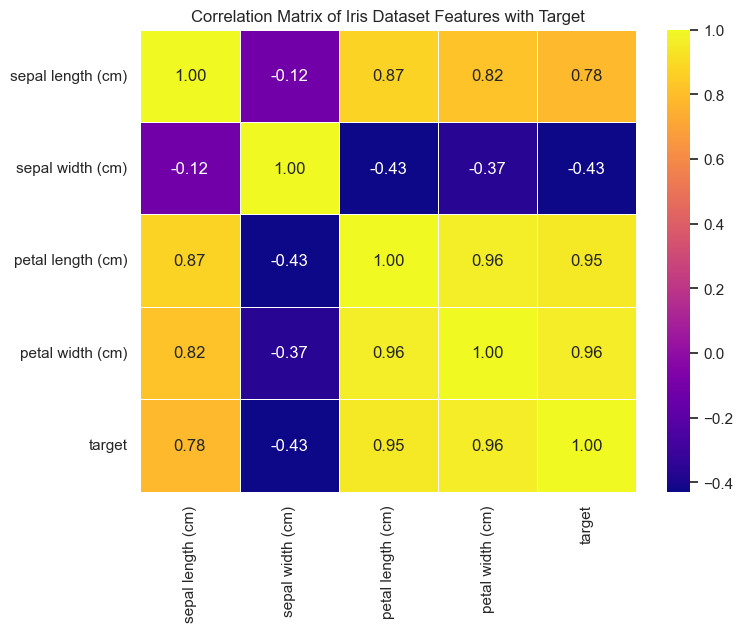

In [6]:
# Concatenate the target column to the feature DataFrame
iris_df_with_target = iris_df.copy()
iris_df_with_target['target'] = iris.target

# Compute the correlation matrix
co_matrix_with_target = iris_df_with_target.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Generate a heatmap of the correlation matrix
sns.heatmap(co_matrix_with_target, annot=True, cmap='plasma', fmt=".2f", linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Matrix of Iris Dataset Features with Target')
plt.show()


##### iv. Three additional graphs using Kaggle for inspiration

* Pair plot for all feature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


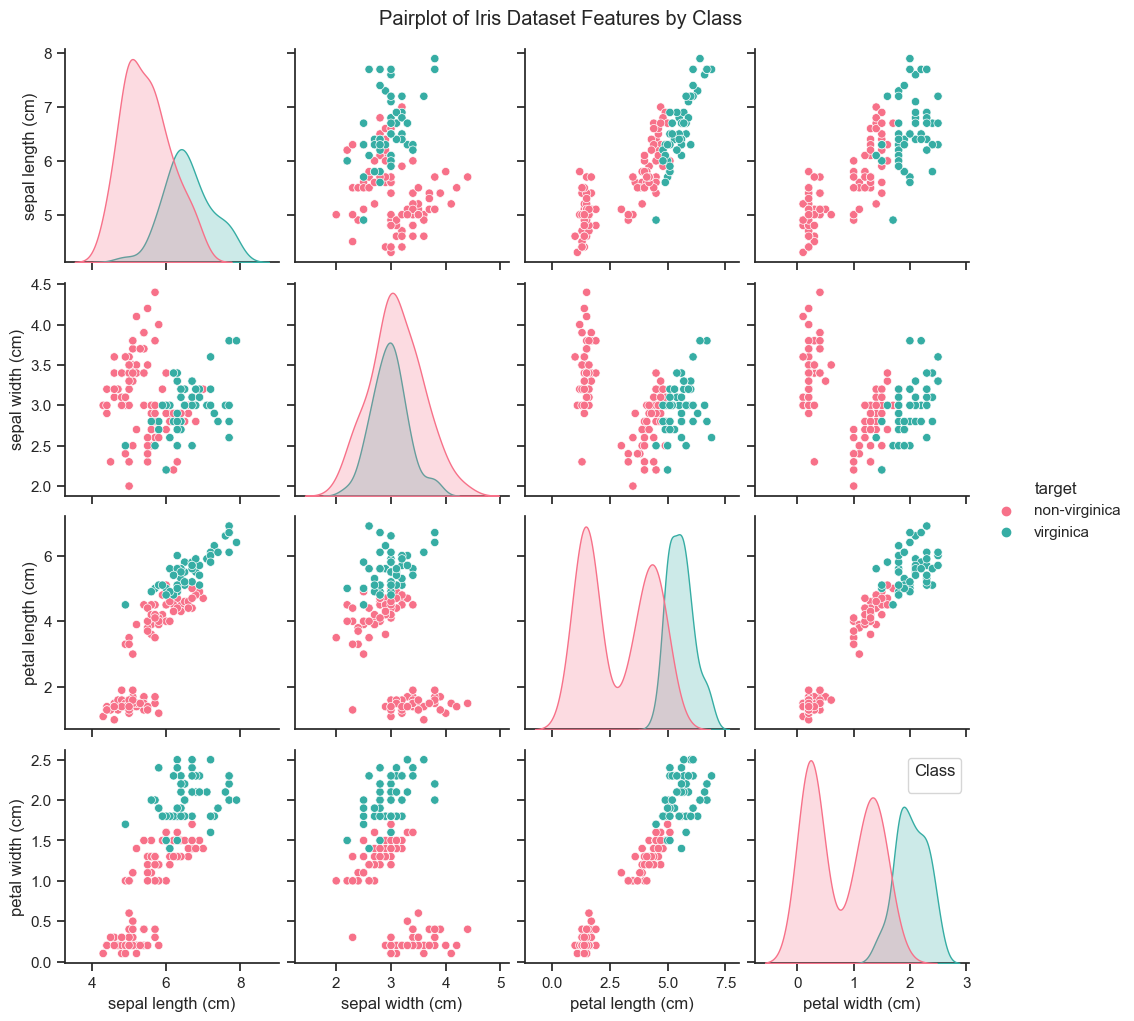

In [7]:
# Set the style of seaborn
sns.set(style="ticks")

# Plot pairplot
sns.pairplot(iris_df, hue="target", palette="husl")
plt.suptitle("Pairplot of Iris Dataset Features by Class", y=1.02)
plt.legend(title='Class', loc='upper right')
plt.show()

* Box plot fo Petal Length

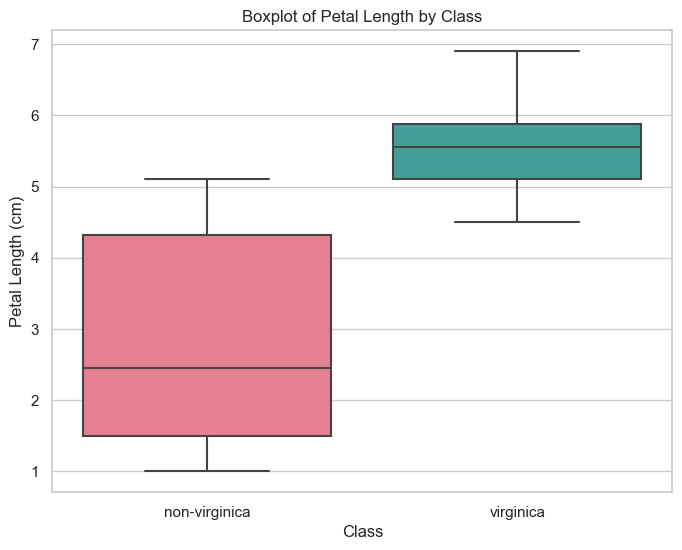

In [8]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=iris_df, x="target", y="petal length (cm)", palette="husl")
plt.title("Boxplot of Petal Length by Class")
plt.xlabel("Class")
plt.ylabel("Petal Length (cm)")
plt.show()

* Violin plot for Sepal Width

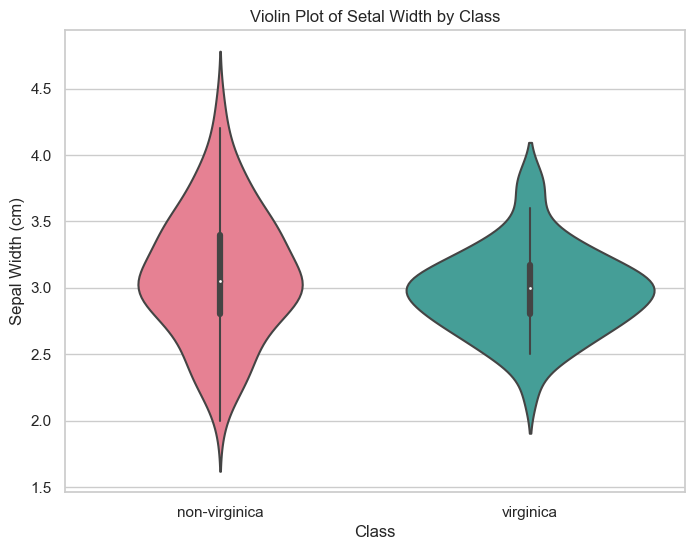

In [9]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(data=iris_df, x="target", y="sepal width (cm)", palette="husl")
plt.title("Violin Plot of Setal Width by Class")
plt.xlabel("Class")
plt.ylabel("Sepal Width (cm)")
plt.show()

##### **Referece**

Palak98039. (n.d.). Python Data Visualizations. Kaggle. <br>
from [Kaggle](https://www.kaggle.com/code/palak98039/python-data-visualizations)

Abdulrahmanelbanna. (n.d.). Iris EDA + Probability Density. Kaggle. <br>
from [Kaggle](https://www.kaggle.com/code/abdulrahmanelbanna/iris-eda-probability-density)

Yunasheng. "Violin Plot". Kaggle, n.d. <br>
from [Kaggle](https://www.kaggle.com/code/yunasheng/violin-plot)

##### v. Three insights.

* The correlation coefficients between the target column and the four features are as follows: sepal length has a correlation of 0.78, petal length has a correlation of 0.95, and petal width has a correlation of 0.96, indicating a strong positive relationship. On the other hand, sepal width has a correlation of -0.43, suggesting a moderate negative relationship, which is the lowest correlation among the features.

* Histogram Insights
1. Sepal Length: The histograms show that 'virginica' tends to have slightly longer sepal lengths compared to 'non-virginica', as seen by the rightward shift in the distribution for 'virginica'.

2. Sepal Width: There's overlap between the distributions of 'virginica' and 'non-virginica', indicating that sepal width alone might not be a strong discriminator between the two classes.

3. Petal Length: 'Virginica' consistently exhibits longer petal lengths compared to 'non-virginica', as evidenced by the rightward shift and higher frequency in the longer petal length range.

4. Petal Width: Similar to petal length, 'virginica' tends to have wider petals compared to 'non-virginica', showing a clear distinction between the two classes.

* Pair Plot :

1. Sepal Length vs. Sepal Width: There's significant overlap between the classes, suggesting that these two features alone might not be sufficient to distinctly separate the classes.

2. Petal Length vs. Petal Width: 'Virginica' tends to have both longer and wider petals compared to 'non-virginica', indicating that these features combined might be more effective in distinguishing between the classes.

3. Diagonal Plots: Along the diagonal, histograms for each feature are displayed. They show the distribution of each feature within each class. Consistent patterns observed in these histograms reinforce the insights gained from individual histograms.

### 3. Split the data to a train set (120 records), a validation set (15 records)  and a test set (15 records). 

In [10]:
# First split: Splitting into train and temporary set (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(iris_df.drop('target', axis=1), iris_df['target'], test_size=30, random_state=42)

# Second split: Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the shapes of the resulting sets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Train set shape: (120, 4)
Validation set shape: (15, 4)
Test set shape: (15, 4)


### 4. Run four logistic regression models, with 1,2,3 and 4 features.

* Model 1 with one feature : sepal length (cm)

In [11]:
log_reg1 = LogisticRegression()
log_reg1.fit(X_train[['sepal length (cm)']], y_train)

LogisticRegression()

* Model 2 with two feature : sepal length and sepal width

In [12]:
log_reg2 = LogisticRegression()
log_reg2.fit(X_train[['sepal length (cm)', 'sepal width (cm)']], y_train)

LogisticRegression()

* Model 3 with three feature : sepal length, sepal width, petal length

In [13]:
log_reg3 = LogisticRegression()
log_reg3.fit(X_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']], y_train)

LogisticRegression()

* Model 4 with four feature : sepal length, sepal width, petal length, petal width

In [14]:
log_reg4 = LogisticRegression()
log_reg4.fit(X_train[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], y_train)

LogisticRegression()

### 5. Evaluate the models on the validation set

##### i. Use the predict and predict_proba methods to list in a table how well each model is doing for each of the instances in the validation set. There should be one table per model. Each table should have four columns: instance number, probability of predicting verginica, actual prediction by the model, ground truth. Next, summarize the data in each table to a single measure (number) per model. What would you use?

**Model 1**

In [15]:
predict1 = log_reg1.predict(X_val[['sepal length (cm)']])
predict_prob1 = log_reg1.predict_proba(X_val[['sepal length (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

df1 = pd.DataFrame({
    'probability of predicting verginica': predict_prob1[:, 1],
    'actual prediction by the model': predict1,
    'Ground Truth': y_val
})
df1

probability of predicting verginica actual prediction by the model   
26                              0.064510                  non-virginica  \
18                              0.217912                  non-virginica   
118                             0.937717                      virginica   
145                             0.671933                      virginica   
78                              0.336388                  non-virginica   
127                             0.382264                  non-virginica   
108                             0.671933                      virginica   
55                              0.217912                  non-virginica   
30                              0.044226                  non-virginica   
29                              0.036520                  non-virginica   
141                             0.753228                      virginica   
110                             0.578831                      virginica   
19                              0.077646                  non-virginica   
132                             0.529589                      virginica   
64                              0.185827                  non-virginica   

      Ground Truth  
26   non-virginica  
18   non-virginica  
118      virginica  
145      virginica  
78   non-virginica  
127      virginica  
108      virginica  
55   non-virginica  
30   non-virginica  
29   non-virginica  
141      virginica  
110      virginica  
19   non-virginica  
132      virginica  
64   non-virginica

**Model 2**

In [16]:
predict2 = log_reg2.predict(X_val[['sepal length (cm)', 'sepal width (cm)']])
predict_prob2 = log_reg2.predict_proba(X_val[['sepal length (cm)', 'sepal width (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

df2 = pd.DataFrame({
    'probability of predicting verginica': predict_prob2[:, 1],
    'actual prediction by the model': predict2,
    'ground truth': y_val
})
df2

probability of predicting verginica actual prediction by the model   
26                              0.050796                  non-virginica  \
18                              0.145047                  non-virginica   
118                             0.949865                      virginica   
145                             0.669280                      virginica   
78                              0.347378                  non-virginica   
127                             0.379491                  non-virginica   
108                             0.732581                      virginica   
55                              0.237155                  non-virginica   
30                              0.041289                  non-virginica   
29                              0.032140                  non-virginica   
141                             0.739476                      virginica   
110                             0.546099                      virginica   
19                              0.048771                  non-virginica   
132                             0.556691                      virginica   
64                              0.193357                  non-virginica   

      ground truth  
26   non-virginica  
18   non-virginica  
118      virginica  
145      virginica  
78   non-virginica  
127      virginica  
108      virginica  
55   non-virginica  
30   non-virginica  
29   non-virginica  
141      virginica  
110      virginica  
19   non-virginica  
132      virginica  
64   non-virginica

**Model 3**

In [17]:
predict3 = log_reg3.predict(X_val[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])
predict_prob3 = log_reg3.predict_proba(X_val[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

df3 = pd.DataFrame({
    'probability of predicting verginica': predict_prob3[:, 1],
    'actual prediction by the model': predict3,
    'ground truth': y_val
})
df3

probability of predicting verginica actual prediction by the model   
26                              0.000016                  non-virginica  \
18                              0.000013                  non-virginica   
118                             0.998416                      virginica   
145                             0.697669                      virginica   
78                              0.227787                  non-virginica   
127                             0.520907                      virginica   
108                             0.958540                      virginica   
55                              0.262784                  non-virginica   
30                              0.000020                  non-virginica   
29                              0.000020                  non-virginica   
141                             0.585897                      virginica   
110                             0.622702                      virginica   
19                              0.000009                  non-virginica   
132                             0.921539                      virginica   
64                              0.015291                  non-virginica   

      ground truth  
26   non-virginica  
18   non-virginica  
118      virginica  
145      virginica  
78   non-virginica  
127      virginica  
108      virginica  
55   non-virginica  
30   non-virginica  
29   non-virginica  
141      virginica  
110      virginica  
19   non-virginica  
132      virginica  
64   non-virginica

**Model 4**

In [18]:
predict4 = log_reg4.predict(X_val[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
predict_prob4 = log_reg4.predict_proba(X_val[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']])
if isinstance(y_val, pd.DataFrame):
    y_val = y_val.squeeze()

df4 = pd.DataFrame({
    'probability of predicting verginica': predict_prob4[:, 1],
    'actual prediction by the model': predict4,
    'ground truth': y_val
})
df4

probability of predicting verginica actual prediction by the model   
26                              0.000009                  non-virginica  \
18                              0.000006                  non-virginica   
118                             0.998534                      virginica   
145                             0.873922                      virginica   
78                              0.207005                  non-virginica   
127                             0.572730                      virginica   
108                             0.946564                      virginica   
55                              0.170670                  non-virginica   
30                              0.000008                  non-virginica   
29                              0.000008                  non-virginica   
141                             0.820222                      virginica   
110                             0.728198                      virginica   
19                              0.000004                  non-virginica   
132                             0.956114                      virginica   
64                              0.016196                  non-virginica   

      ground truth  
26   non-virginica  
18   non-virginica  
118      virginica  
145      virginica  
78   non-virginica  
127      virginica  
108      virginica  
55   non-virginica  
30   non-virginica  
29   non-virginica  
141      virginica  
110      virginica  
19   non-virginica  
132      virginica  
64   non-virginica

**Accuracy Score for Each Models**

In [19]:
from sklearn.metrics import accuracy_score
accuracy1 = accuracy_score(y_val, predict1)
print("Accuracy of the logistic regression model1 is: ", accuracy1)
accuracy2 = accuracy_score(y_val, predict2)
print("Accuracy of the logistic regression model2 is: ", accuracy2)
accuracy3 = accuracy_score(y_val, predict3)
print("Accuracy of the logistic regression model3 is: ", accuracy3)
accuracy4 = accuracy_score(y_val, predict4)
print("Accuracy of the logistic regression model4 is: ", accuracy4)

Accuracy of the logistic regression model1 is:  0.9333333333333333
Accuracy of the logistic regression model2 is:  0.9333333333333333
Accuracy of the logistic regression model3 is:  1.0
Accuracy of the logistic regression model4 is:  1.0


##### ii Plot the decision boundary for three models (with 1, 2 and 3 features; 3 plots), together with the validation data. Tip: using Plotly will allow you to rotate the 3D graph with the 3 features. Tip: for the code required to find the decision boundary you can look at this notebook in the course repository

**Model 1**

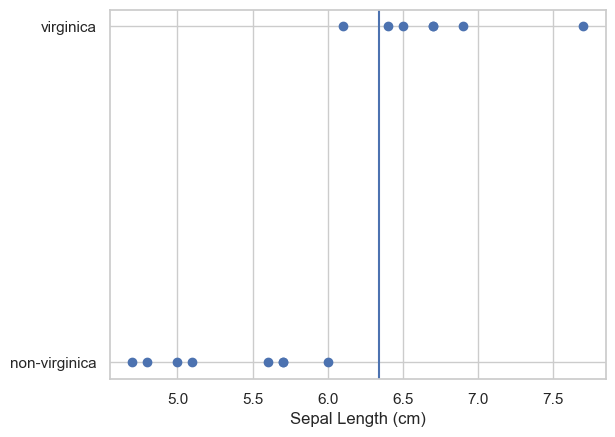

In [20]:
X_val_feature = X_val['sepal length (cm)']

decision_boundary = -log_reg1.intercept_ / log_reg1.coef_[0]
plt.scatter(X_val_feature, y_val)
plt.axvline(x=decision_boundary)

plt.xlabel('Sepal Length (cm)')
plt.show()


**Model 2**

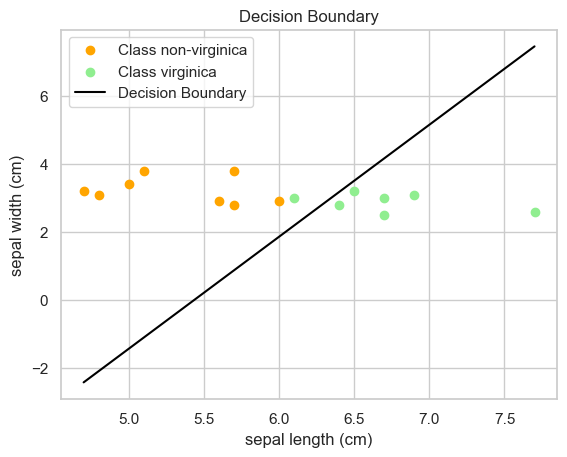

In [21]:
decision_boundary_x1 = np.linspace(X_val['sepal length (cm)'].min(), X_val['sepal length (cm)'].max(), 10)
decision_boundary_x2 = -log_reg2.intercept_ / log_reg2.coef_[0][1] - log_reg2.coef_[0][0] / log_reg2.coef_[0][1] * decision_boundary_x1

# Get unique classes in y_val
classes = np.unique(y_val)

# Define colors for each class
colors = ['orange', 'lightgreen']  # You may need to add more colors if you have more than three classes

# Plot the scatter plot with different colors for each class
for class_label, color in zip(classes, colors):
    plt.scatter(X_val[y_val == class_label]['sepal length (cm)'], 
                X_val[y_val == class_label]['sepal width (cm)'],
                color=color, label=f'Class {class_label}')

# Plot the decision boundary
plt.plot(decision_boundary_x1, decision_boundary_x2, color='black', label='Decision Boundary')

# Add labels and title
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('Decision Boundary')

# Add legend
plt.legend()

# Show plot
plt.show()


**Model 3**

In [24]:
import plotly.graph_objs as go
import plotly

plotly.offline.init_notebook_mode()

min_feature_value1 = X_val['sepal length (cm)'].min(axis=0) - 1
max_feature_value1 = X_val['sepal length (cm)'].max(axis=0) + 1
min_feature_value2 = X_val['sepal width (cm)'].min(axis=0) - 1
max_feature_value2 = X_val['sepal width (cm)'].max(axis=0) + 1

x1, x2 = np.meshgrid(np.linspace(min_feature_value1, max_feature_value1, 100),
                     np.linspace(min_feature_value2, max_feature_value2, 100))

x3 = (-log_reg3.intercept_ - log_reg3.coef_[0][0] * x1 - log_reg3.coef_[0][1] * x2) / log_reg3.coef_[0][2]
decision_boundary_surface = go.Surface(x=x1, y=x2, z=x3, colorscale='Viridis', opacity=0.5)

data_scatter = go.Scatter3d(x=X_val['sepal length (cm)'], y=X_val['sepal width (cm)'], z=X_val['petal length (cm)'],
                            mode='markers', 
                            marker=dict(size=5, colorscale='Bluered', opacity=0.8))

layout = go.Layout(title='3D plot with decision boundary',
                   scene=dict(xaxis_title='sepal length (cm)',
                              yaxis_title='sepal width (cm)',
                              zaxis_title='petal length (cm)'),
                   margin=dict(l=0, r=0, b=0, t=0))

fig = go.Figure(data=[decision_boundary_surface, data_scatter], layout=layout)
fig.show()

### 6. Recommend the best model (provide reasoning). Summarize the results of this model on the test set. Tip: you can use the "single-number" measure you used on the validation set 

In [23]:
# Make predictions on the test set
test_predictions = log_reg3.predict(X_test[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)']])

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print(f"Accuracy on the test set: {test_accuracy:.4f}")

Accuracy on the test set: 1.0000


* Based on the accuracy mentioned earlier, the **third logistic regression model**, which uses three features (sepal length, sepal width, and petal width), has the highest accuracy. Additionally, it performs very well, achieving a perfect 100% accuracy on the test set too.